# Understanding Manifold Learning
These are personal notes on multidimensional scaling derived from [here](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html)

Principal component analysis (PCA) can be used for dimensionality reduction but it does not perform so well when there are non-linear relationships *within* the data.

** Manifold Learning ** are a class of unsupervised models to describe datasets as low-dimensional manifolds.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [8]:
def make_hello(N=1000,rseed=42):
    # Make a plot of HELLO text and save as PNG
    fig, ax = plt.subplots(figsize=(4,1))
    fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
    ax.axis("off")
    ax.text(0.5,0.4,'HELLO',va='center',ha='center',weight='bold',size=85)
    fig.savefig('hello.png')
    plt.close(fig)

    # open png and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1,:,0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

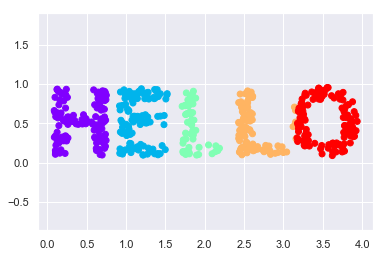

In [18]:
X = make_hello(500)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

What is fundamental in this dataset are the distances of the points between each other.

In [19]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(500, 500)

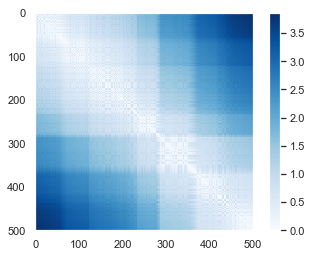

In [20]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

We can to use the multidimensional scaling algorithm to take the distance matrix and recover the actual representation of the data.

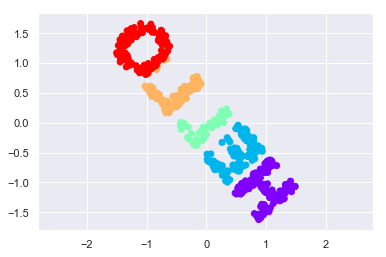

In [21]:
from sklearn.manifold import MDS
model = MDS(n_components=2,dissimilarity='precomputed',random_state=1) 
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');